In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("/Users/selimcamlibel/bootcamp/w5/w5d2/diabetes.csv", header=None, names=col_names).drop(index=0)

In [3]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
feature_cols

['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


In [10]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

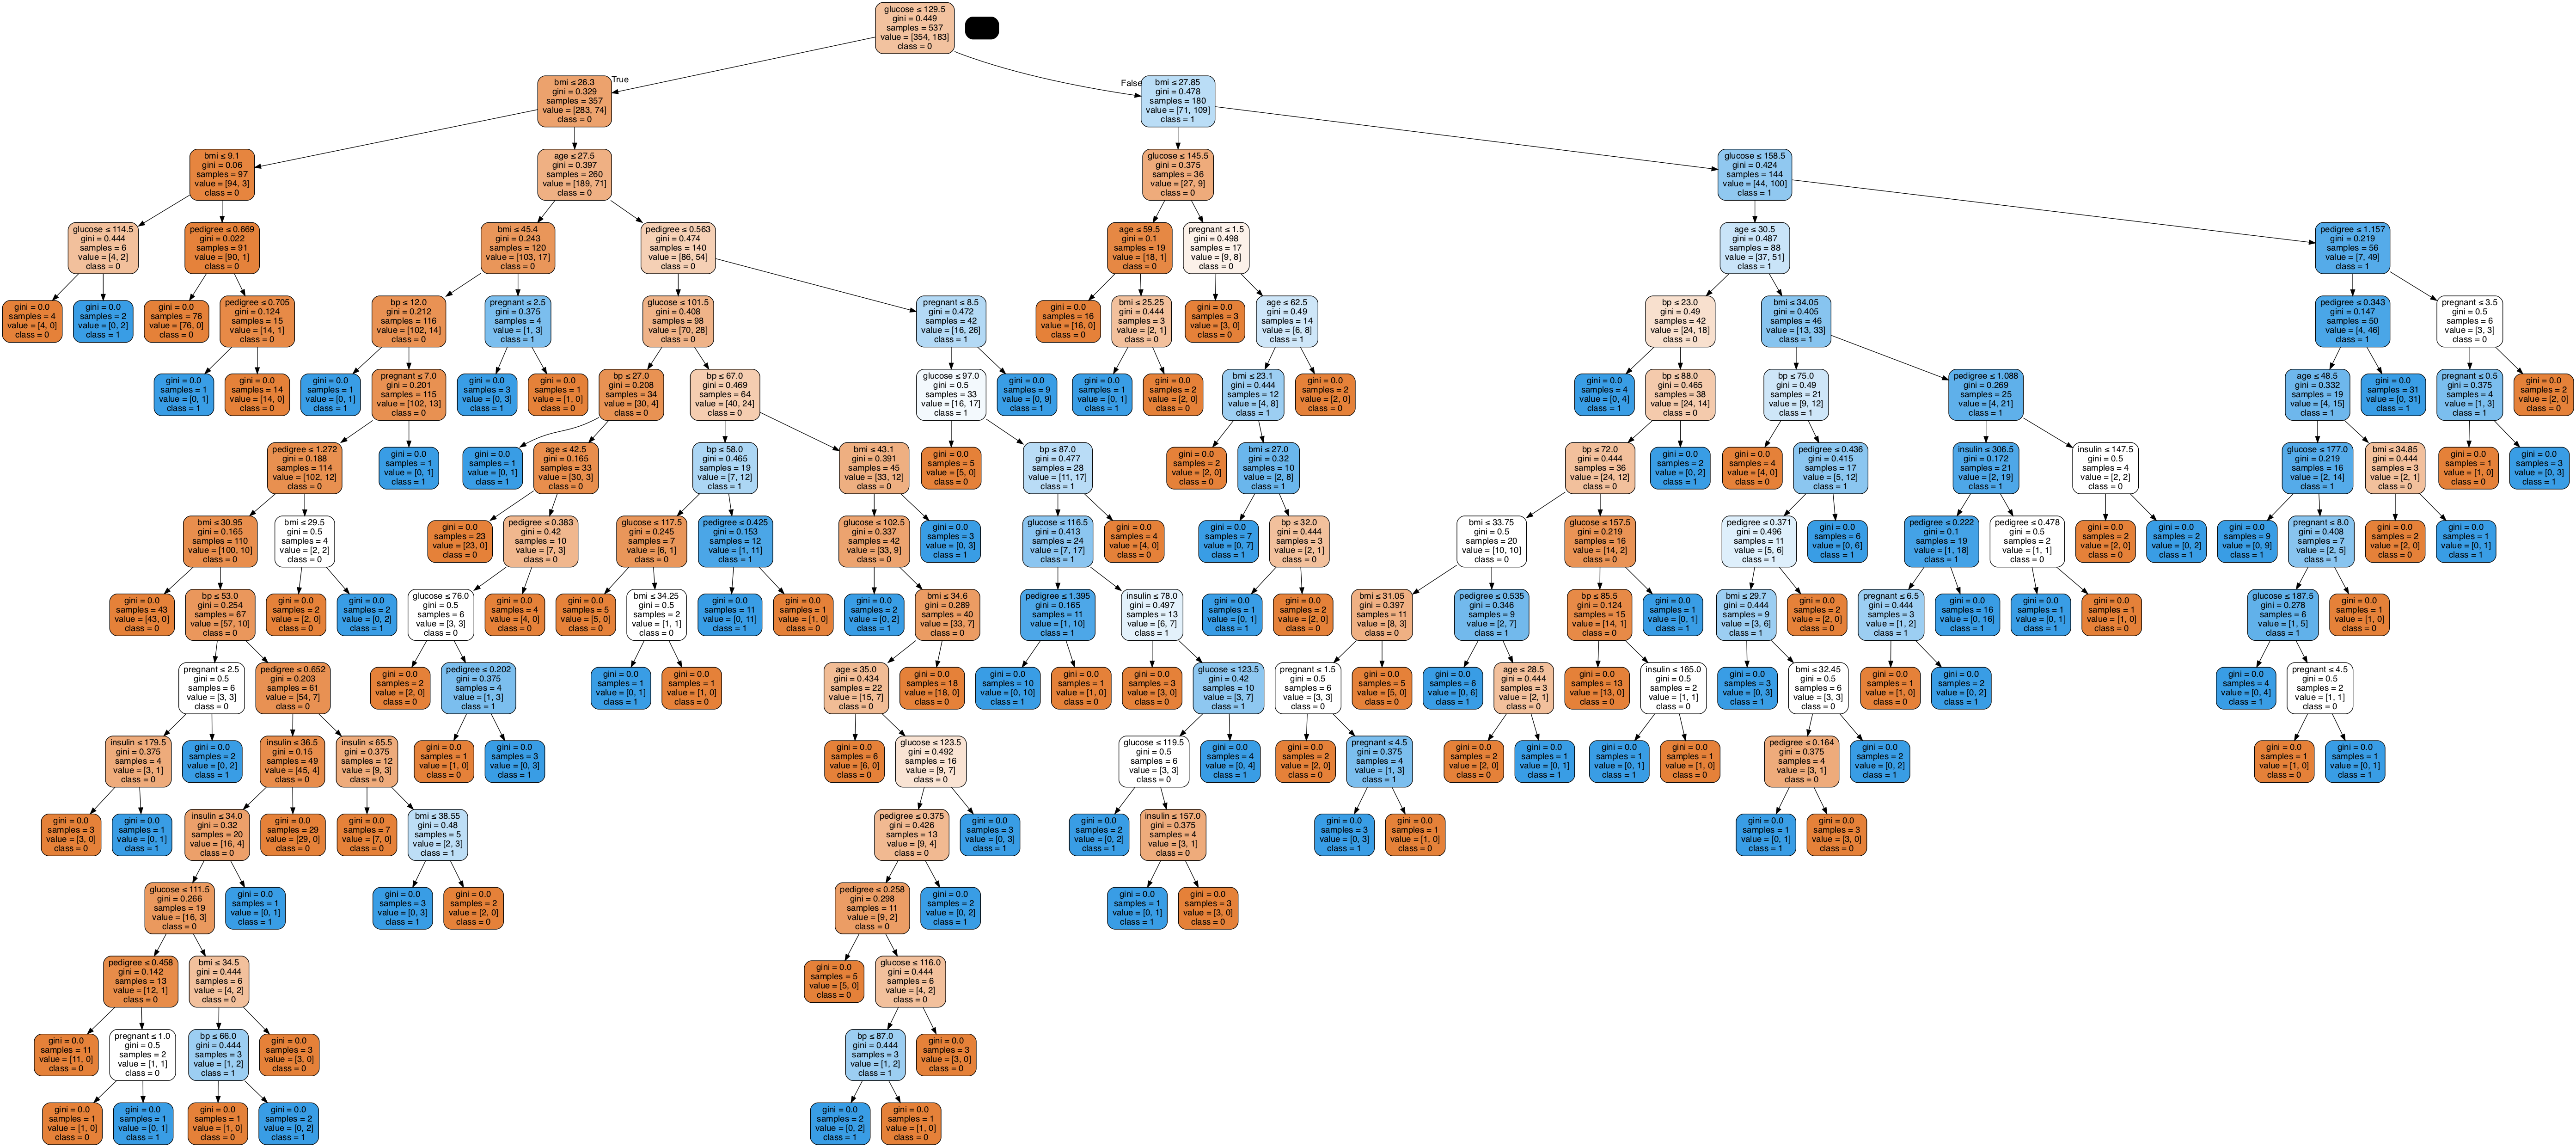

In [11]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


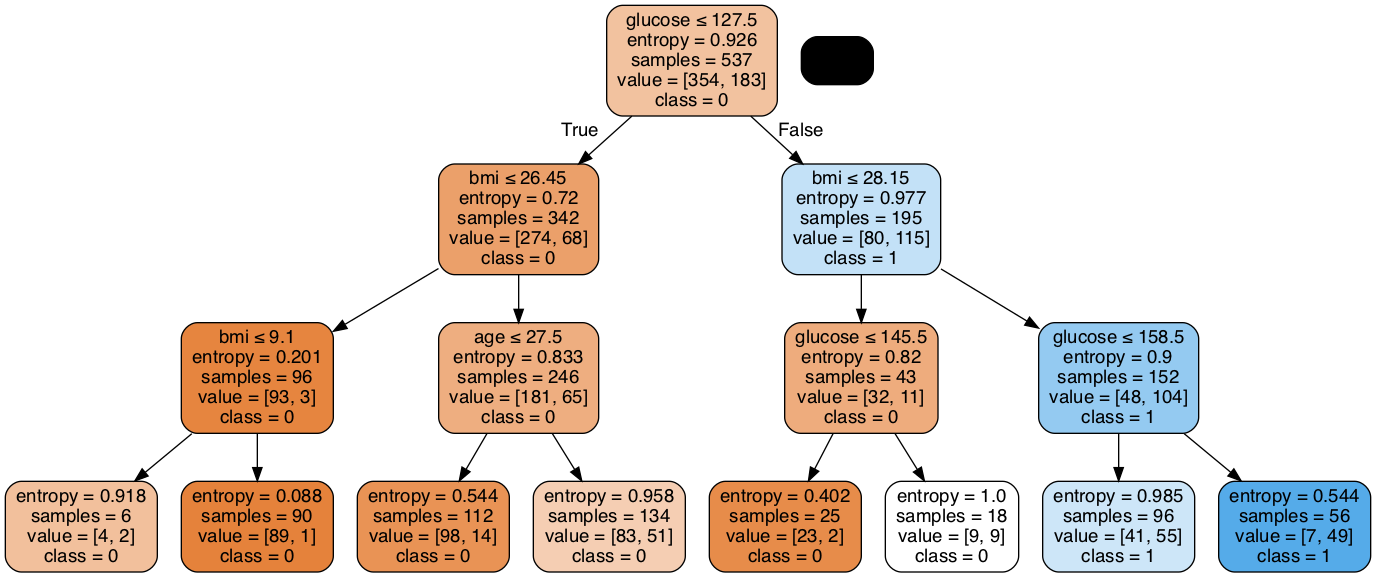

In [14]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [1]:
from plot_classifier import plot_classifier

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
 
# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target
 
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
 
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.0


In [4]:
import pandas as pd
import numpy as np

In [17]:
# Create an empty dataframe
data = pd.DataFrame()

# Create our target variable
data['Gender'] = ['male','male','male','male','female','female','female','female']

# Create our feature variables
data['Height'] = [6,5.92,5.58,5.92,5,5.5,5.42,5.75]
data['Weight'] = [180,190,170,165,100,150,130,150]
data['Foot_Size'] = [12,11,12,10,6,8,7,9]

# View the data
data

,Gender,Height,Weight,Foot_Size
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


In [18]:
# Create an empty dataframe
person = pd.DataFrame()

# Create some feature values for this single row
person['Height'] = [6]
person['Weight'] = [130]
person['Foot_Size'] = [8]

# View the data 
person

,Height,Weight,Foot_Size
0,6,130,8


In [19]:
# Number of males
n_male = data['Gender'][data['Gender'] == 'male'].count()

# Number of males
n_female = data['Gender'][data['Gender'] == 'female'].count()

# Total rows
total_ppl = data['Gender'].count()

In [20]:
# Number of males divided by the total rows
P_male = n_male/total_ppl

# Number of females divided by the total rows
P_female = n_female/total_ppl

In [21]:
# Group the data by gender and calculate the means of each feature
data_means = data.groupby('Gender').mean()

# View the values
data_means

,Height,Weight,Foot_Size
Gender,,,
female,5.4175,132.50,7.50
male,5.8550,176.25,11.25


In [22]:
# Group the data by gender and calculate the variance of each feature
data_variance = data.groupby('Gender').var()

# View the values
data_variance

,Height,Weight,Foot_Size
Gender,,,
female,0.097225,558.333333,1.666667
male,0.035033,122.916667,0.916667


In [23]:
# Means for male
male_height_mean = data_means['Height'][data_variance.index == 'male'].values[0]
male_weight_mean = data_means['Weight'][data_variance.index == 'male'].values[0]
male_footsize_mean = data_means['Foot_Size'][data_variance.index == 'male'].values[0]

# Variance for male
male_height_variance = data_variance['Height'][data_variance.index == 'male'].values[0]
male_weight_variance = data_variance['Weight'][data_variance.index == 'male'].values[0]
male_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'male'].values[0]

# Means for female
female_height_mean = data_means['Height'][data_variance.index == 'female'].values[0]
female_weight_mean = data_means['Weight'][data_variance.index == 'female'].values[0]
female_footsize_mean = data_means['Foot_Size'][data_variance.index == 'female'].values[0]

# Variance for female
female_height_variance = data_variance['Height'][data_variance.index == 'female'].values[0]
female_weight_variance = data_variance['Weight'][data_variance.index == 'female'].values[0]
female_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'female'].values[0]

In [24]:
# Create a function that calculates p(x | y):
def p_x_given_y(x, mean_y, variance_y):

    # Input the arguments into a probability density function
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    
    # return p
    return p

In [27]:
# Numerator of the posterior if the unclassified observation is a male
male_res = P_male * \
p_x_given_y(person['Height'][0], male_height_mean, male_height_variance) * \
p_x_given_y(person['Weight'][0], male_weight_mean, male_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], male_footsize_mean, male_footsize_variance)

In [28]:
# Numerator of the posterior if the unclassified observation is a female
female_res = P_female * \
p_x_given_y(person['Height'][0], female_height_mean, female_height_variance) * \
p_x_given_y(person['Weight'][0], female_weight_mean, female_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], female_footsize_mean, female_footsize_variance)


In [43]:
if female_res>male_res:
    print("person is female  -number of posterior is:")
    print(female_res)
if male_res>female_res:
    print("person is male  -number of posterior is:")
    print(male_res)

person is female  -number of posterior is:
0.0005377909183630018


In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [2]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [3]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% tes

In [4]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [5]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [6]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629
